In [60]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [61]:
Penguins = sns.load_dataset('penguins')

In [62]:
Penguins.head()
Penguins = Penguins.dropna()

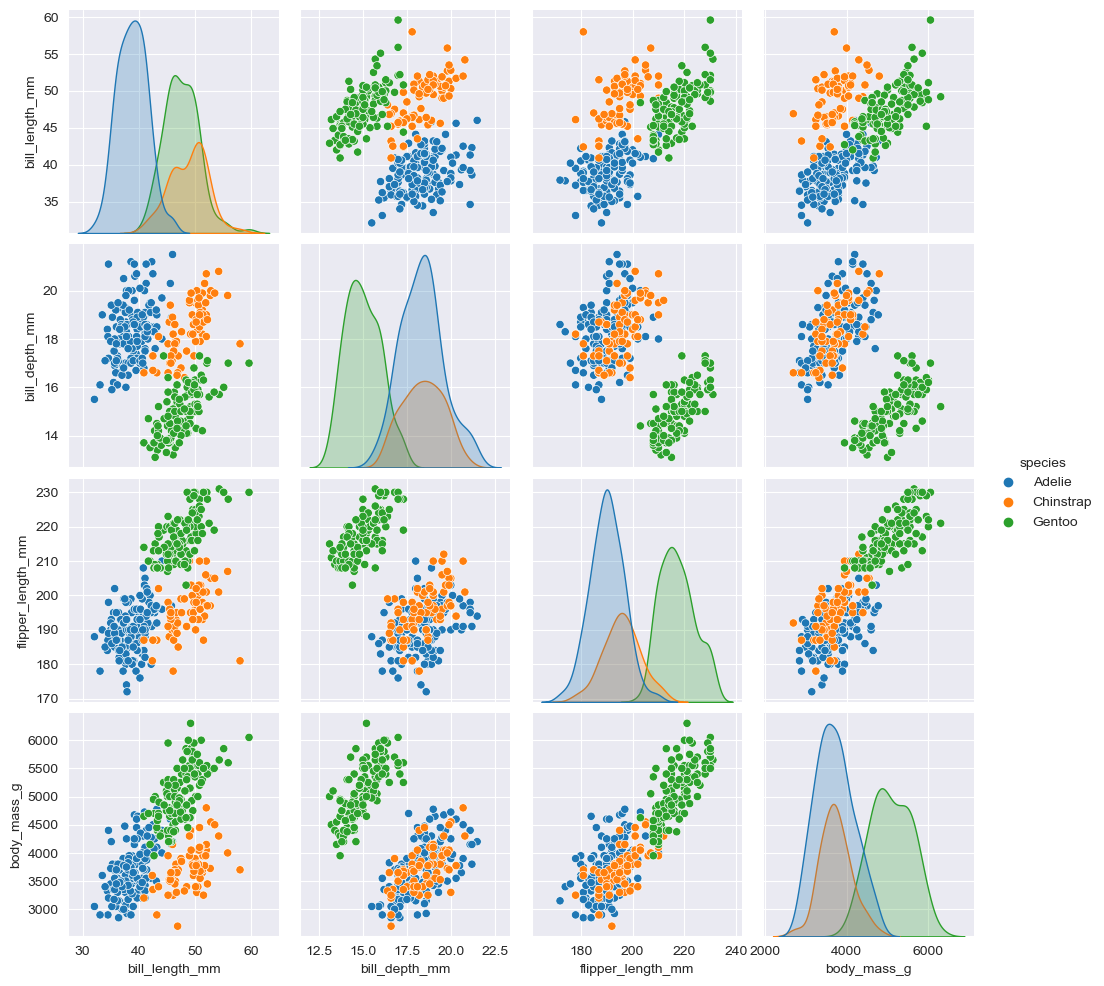

In [63]:
sns.pairplot(Penguins, hue='species')
plt.show()

This data set consists of three different Penguin species. Looking at the pair plot we can see there are some graphs where the species are clearly separated. For example the bill length and depth of the Gentoo penguins are clearly separated from the other two species.

In [64]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=3,random_state=43).fit(Penguins[features])
Penguins['cluster'] = km.predict(Penguins[features])

In [65]:
Penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


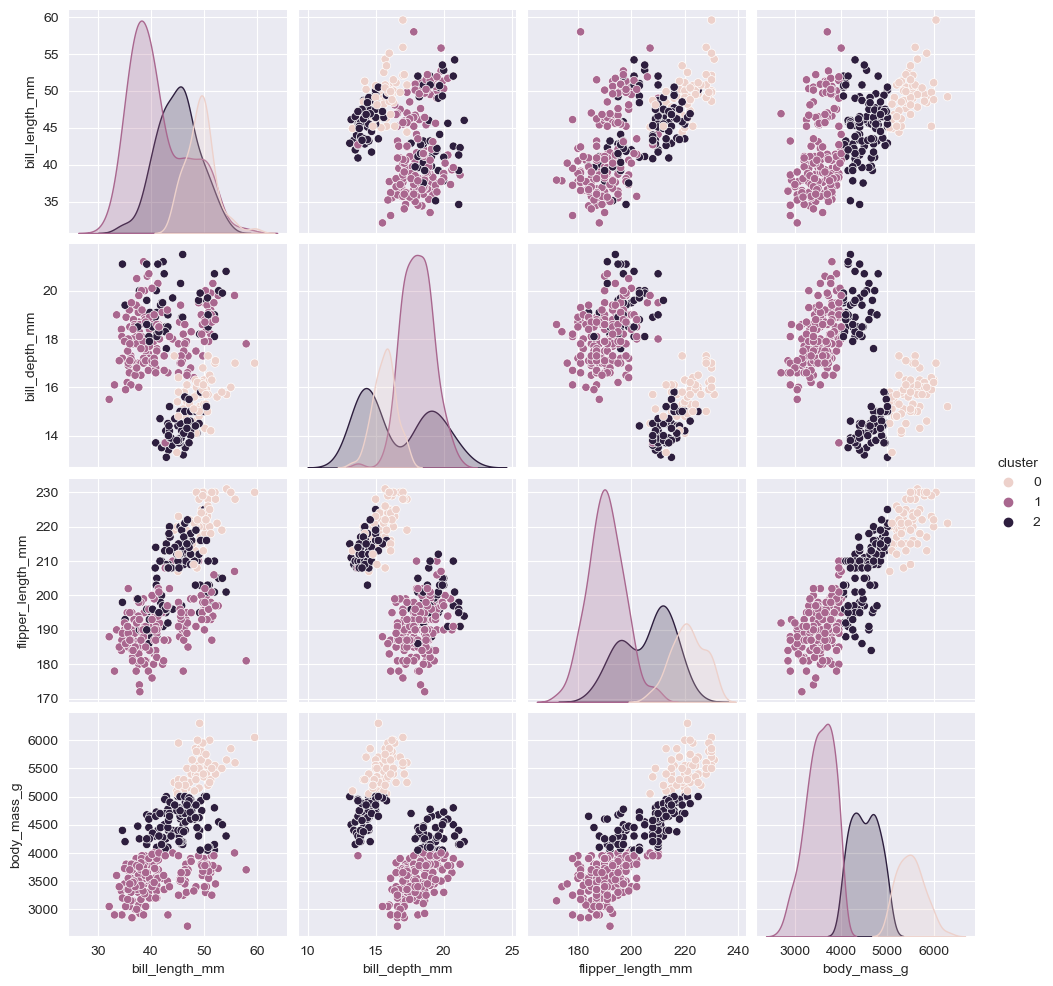

In [66]:
sns.pairplot(Penguins, hue='cluster')
plt.show()

In [67]:
metrics.silhouette_score(Penguins[features], km.labels_, metric='euclidean')

0.5852771550448385

In [68]:
contingency_table = Penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1,2
species,,,
Adelie,0,112,34
Chinstrap,0,53,15
Gentoo,61,1,57


Making three clusters is the most logical first step since there are three species. If we use two clusters we get the following results:

In [69]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2,random_state=43).fit(Penguins[features])
Penguins['cluster'] = km.predict(Penguins[features])

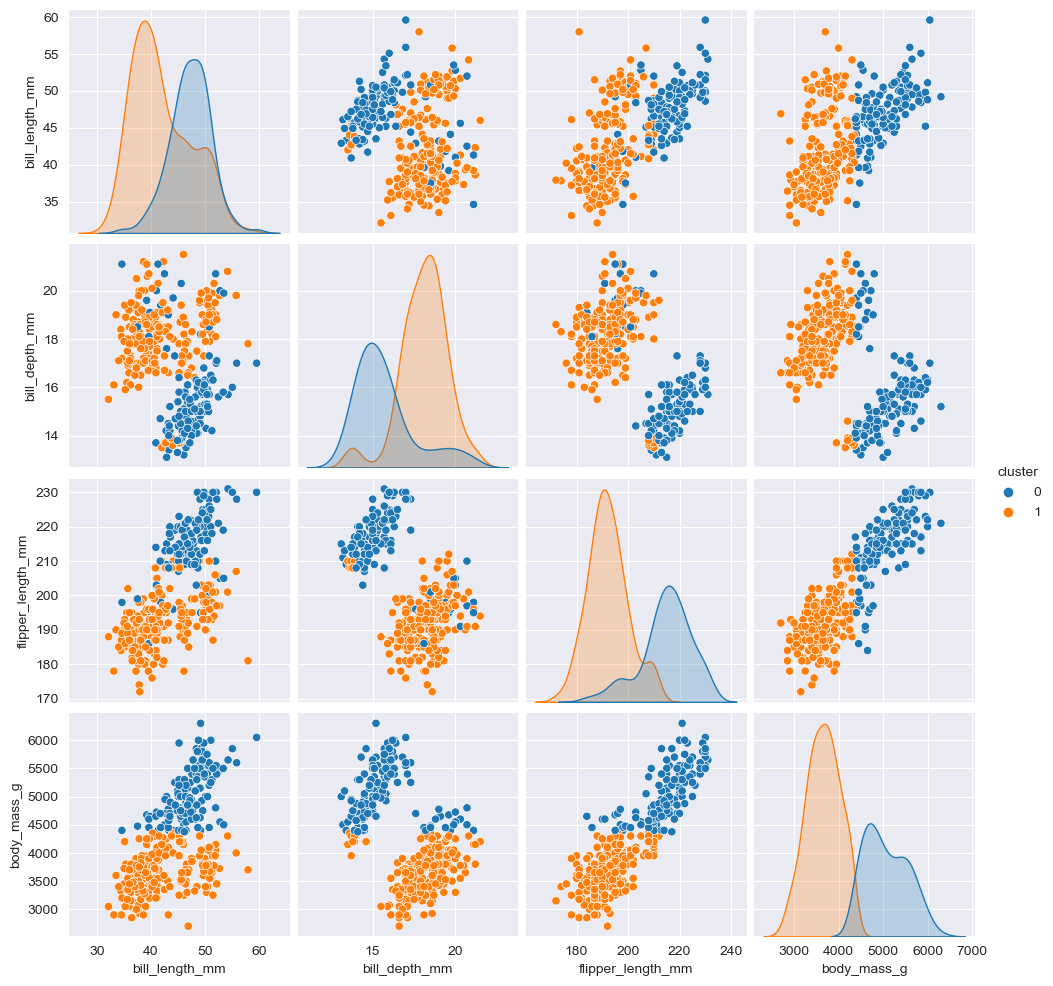

In [70]:
sns.pairplot(Penguins, hue='cluster')
plt.show()

In [71]:
metrics.silhouette_score(Penguins[features], km.labels_, metric='euclidean')

0.6307117469850305

In [72]:
contingency_table = Penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,14,132
Chinstrap,5,63
Gentoo,111,8


We get some interesting results, as we can see the silhouette score rises when we have only two clusters. What arer the results when we reduce the number of features used. For example if we only use the bill length and depth:

In [73]:
features = ['bill_length_mm', 'bill_depth_mm']
km = KMeans(n_clusters=3,random_state=43).fit(Penguins[features])
Penguins['cluster'] = km.predict(Penguins[features])

In [74]:
sns.pairplot(Penguins, hue='cluster')

In [75]:
metrics.silhouette_score(Penguins[features], km.labels_, metric='euclidean')


0.48441306051483224

In [76]:
contingency_table = Penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1,2
species,,,
Adelie,0,135,11
Chinstrap,40,1,27
Gentoo,45,0,74
